### Requirements
- pandas == 1.5.3
- numpy == 1.23.5
- matplotlib == 3.7.1
- seaborn == 0.12.2

# EDA

In [ ]:
!pip list

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



---
## 1. 데이터 확인
- train 데이터 : 총 9324개, null값 없음
  - 'label' : 실수(float64)형 -> Regression
- dev 데이터 : 총 550개, null값 없음
- train 데이터 : 총 1100개, null값 없음

In [ ]:
train = pd.read_csv('train.csv')
dev = pd.read_csv('dev.csv')
test = pd.read_csv('test.csv')

In [ ]:
print("[train]","="*32)
print("\n",train.info())
print("[dev]","="*35)
print("\n",dev.info())
print("[test]","="*32)
print("\n",test.info())
print("="*40)

[train] ================================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9324 entries, 0 to 9323
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            9324 non-null   object 
 1   source        9324 non-null   object 
 2   sentence_1    9324 non-null   object 
 3   sentence_2    9324 non-null   object 
 4   label         9324 non-null   float64
 5   binary-label  9324 non-null   float64
dtypes: float64(2), object(4)
memory usage: 437.2+ KB

 None
[dev] ===================================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            550 non-null    object 
 1   source        550 non-null    object 
 2   sentence_1    550 non-null    object 
 3   sentence_2    550 non-null    object 
 4   label         550 non-null    float64
 






---


## 2. label 분포 확인
- train['label']의 0은 2119 개로, train 데이터셋의 약 23% 을 차지하므로 train dataset은 불균형(imbalabced) 하다.
- train, dev, test set의 분포가 Uniform & random 해야하므로 label 0 data drop, data augmentation 필요성 대두

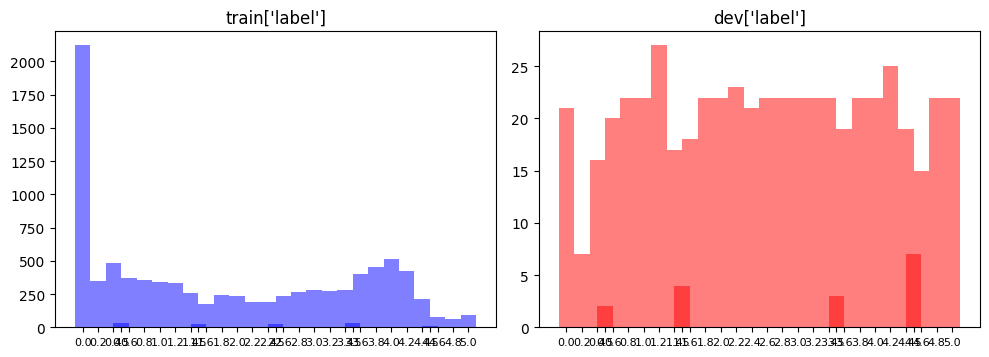

In [ ]:
# For train data
feature_train = train['label']
temp_train = feature_train.value_counts()

# For dev data
feature_dev = dev['label']
temp_dev = feature_dev.value_counts()

# subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# train data 그래프
ax1.bar(temp_train.keys(), temp_train.values, width=0.2, color='b', alpha=0.5)
ax1.set_title('train[\'label\']')
ax1.set_xticks(temp_train.keys())
ax1.set_xticklabels(temp_train.keys(), fontsize=8)

# dev data 그래프
ax2.bar(temp_dev.keys(), temp_dev.values, width=0.2, color='r', alpha=0.5)
ax2.set_title('dev[\'label\']')
ax2.set_xticks(temp_dev.keys())
ax2.set_xticklabels(temp_dev.keys(), fontsize=8)

# 레이아웃 조정
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
from scipy.stats import ks_2samp

statistic, p_value = ks_2samp(train['label'], dev['label'])

print(f"KS Statistic: {statistic}")
print(f"P-value: {p_value}")
# 귀무가설 기각하므로 분포가 같다고 할 수 없다. (0.05/0.025)

KS Statistic: 0.23960960960960961
P-value: 1.0381595316273763e-26


In [ ]:
# 하나씩 크게 보고 싶을 때
# feature = train['label']  # or dev

# plt.figure(figsize=(10, 7.5))
# #plt.title('Label Count', fontsize=20)

# temp = feature.value_counts()
# plt.bar(temp.keys(), temp.values, width=0.2, color='b', alpha=0.5)
# plt.xticks(temp.keys(), fontsize=8) # x축 값, 폰트 크기 설정
# plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정
# plt.show() # 그래프 나타내기
# # label == 0 :: 2119



---
## 3. Source 분포 확인
- train, dev dataset 의 source 분포는 비슷하다.
- one-hot encoding 을 이용해 Object 형을 숫자형으로 변환해 회귀식 이용 가능성 제시



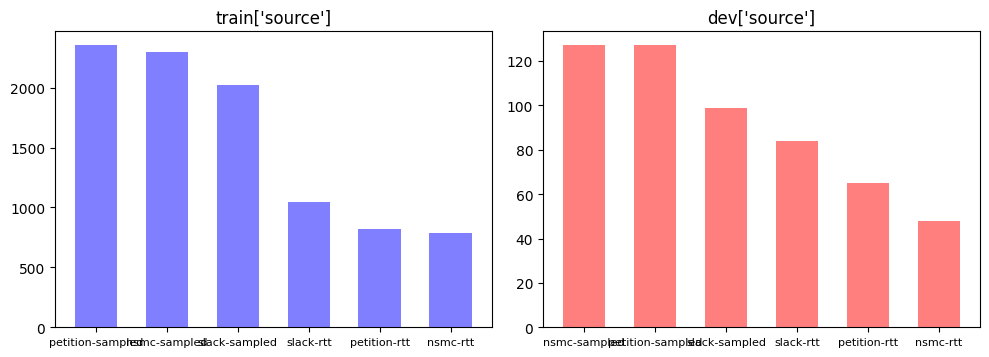

In [ ]:
# For train data
feature_train = train['source']
temp_train = feature_train.value_counts()

# For dev data
feature_dev = dev['source']
temp_dev = feature_dev.value_counts()

# subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# train data 그래프
ax1.bar(temp_train.keys(), temp_train.values, width=0.6, color='b', alpha=0.5)
ax1.set_title('train[\'source\']')
ax1.set_xticks(temp_train.keys())
ax1.set_xticklabels(temp_train.keys(), fontsize=8)

# dev data 그래프
ax2.bar(temp_dev.keys(), temp_dev.values, width=0.6, color='r', alpha=0.5)
ax2.set_title('dev[\'source\']')
ax2.set_xticks(temp_dev.keys())
ax2.set_xticklabels(temp_dev.keys(), fontsize=8)

# 레이아웃 조정
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
from scipy.stats import ks_2samp

statistic, p_value = ks_2samp(train['source'], dev['source'])

print(f"KS Statistic: {statistic}")
print(f"P-value: {p_value}")
# 귀무가설 하므로, 분포가 같다고 볼 수 있다.

KS Statistic: 0.037074217074217077
P-value: 0.4615171426664858




---

## 4. 문장 길이 확인

In [ ]:
print(f"sentence_1 Max: {np.max(dev['sentence_1'].str.len())}, sentence_2 Max: {np.max(dev['sentence_2'].str.len())}")
print(f"sentence_1 Mean: {np.mean(dev['sentence_1'].str.len())}, sentence_2 Mean: {np.mean(dev['sentence_2'].str.len())}")
print(f"sentence_1 Min: {np.min(dev['sentence_1'].str.len())}, sentence_2 Min: {np.min(dev['sentence_2'].str.len())}")

sentence_1 Max: 97, sentence_2 Max: 104
sentence_1 Mean: 23.381818181818183, sentence_2 Mean: 24.167272727272728
sentence_1 Min: 10, sentence_2 Min: 6


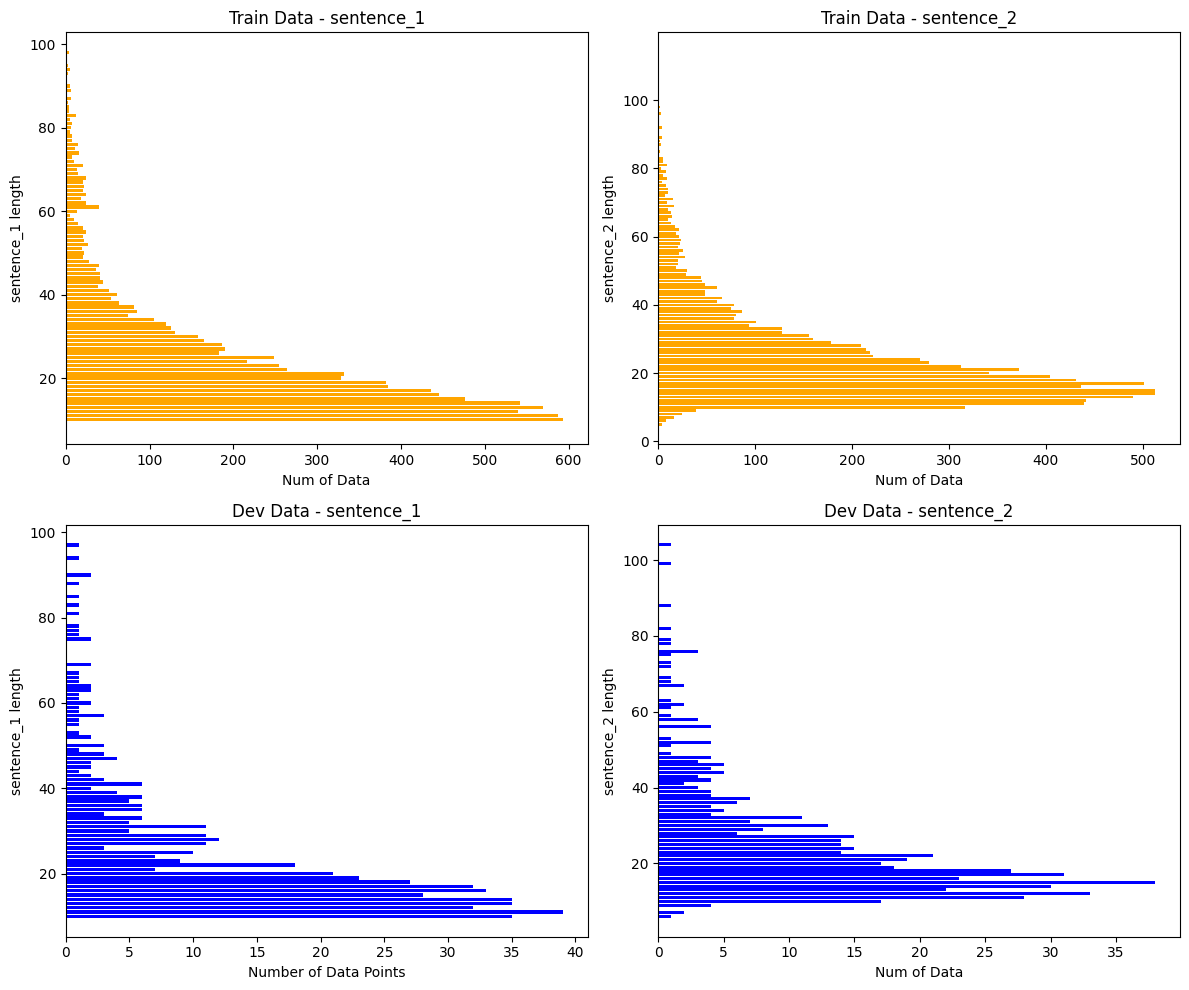

In [ ]:
# Train data - sentence_1
plt.figure(figsize=(12, 10))

# Train data - sentence_1
plt.subplot(2, 2, 1)
train_sentence1_lengths = train['sentence_1'].str.len()
plt.barh(train_sentence1_lengths.value_counts().index, train_sentence1_lengths.value_counts().values, color='orange')
plt.title('Train Data - sentence_1')
plt.xlabel('Num of Data')
plt.ylabel('sentence_1 length')

# Train data - sentence_2
plt.subplot(2, 2, 2)
train_sentence2_lengths = train['sentence_2'].str.len()
plt.barh(train_sentence2_lengths.value_counts().index, train_sentence2_lengths.value_counts().values, color='orange')
plt.title('Train Data - sentence_2')
plt.xlabel('Num of Data')
plt.ylabel('sentence_2 length')

# Dev data - sentence_1
plt.subplot(2, 2, 3)
dev_sentence1_lengths = dev['sentence_1'].str.len()
plt.barh(dev_sentence1_lengths.value_counts().index, dev_sentence1_lengths.value_counts().values, color='blue')
plt.title('Dev Data - sentence_1')
plt.xlabel('Number of Data Points')
plt.ylabel('sentence_1 length')

# Dev data - sentence_2
plt.subplot(2, 2, 4)
dev_sentence2_lengths = dev['sentence_2'].str.len()
plt.barh(dev_sentence2_lengths.value_counts().index, dev_sentence2_lengths.value_counts().values, color='blue')
plt.title('Dev Data - sentence_2')
plt.xlabel('Num of Data')
plt.ylabel('sentence_2 length')


plt.tight_layout()
plt.show()

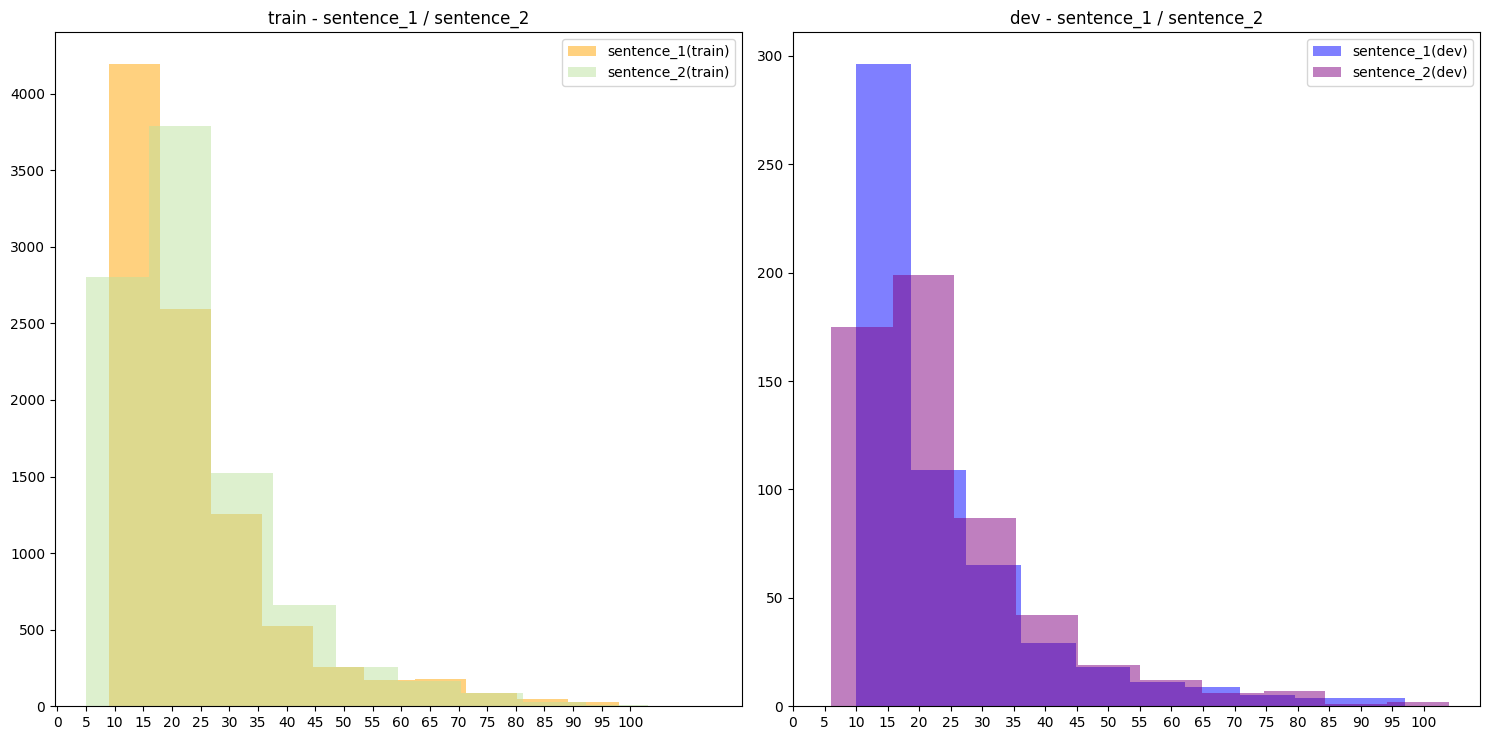

In [ ]:
# train 데이터
xtick = [i * 5 for i in range(21)]
plt.figure(figsize=(15, 7.5))

plt.subplot(1, 2, 1)  # 1행 2열의 첫 번째 subplot
plt.hist(train['sentence_1'].str.len(), alpha=0.5, color='orange', label='sentence_1(train)')
plt.hist(train['sentence_2'].str.len(), alpha=0.5, color='#bce29e', label='sentence_2(train)')
plt.xticks(xtick)
plt.title('train - sentence_1 / sentence_2')
plt.legend()

# dev 데이터
plt.subplot(1, 2, 2)  # 1행 2열의 두 번째 subplot
plt.hist(dev['sentence_1'].str.len(), alpha=0.5, color='blue', label='sentence_1(dev)')
plt.hist(dev['sentence_2'].str.len(), alpha=0.5, color='purple', label='sentence_2(dev)')
plt.xticks(xtick)
plt.title('dev - sentence_1 / sentence_2')
plt.legend()

plt.tight_layout()
plt.show()



---
# Reference
- [9.5 사이파이를 사용한 검정 - scipy.stats.ks_2samp ](https://datascienceschool.net/02%20mathematics/09.05%20%EC%82%AC%EC%9D%B4%ED%8C%8C%EC%9D%B4%EB%A5%BC%20%EC%82%AC%EC%9A%A9%ED%95%9C%20%EA%B2%80%EC%A0%95.html
) : 콜모고로프-스미르노프 검정(Kolmogorov-Smirnov test)
- [KS(Kolmogorov-Smirnov Statistics) 통계량 알아보기](https://data-newbie.tistory.com/874)